In [1]:
#%matplotlib notebook
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
import glob
import os.path
import scipy.io
import skimage.io

Script used to make this data is in `/bf_pulse/workflows/lsm780_sigbyfp.sh`

# First Lets look at the raw histograms. 

In [26]:
data_path = "../../datasets/LSM780_10x_sigb/bg_values_redux"
bgsub_dir = "../../proc_data/slice10x_analysis/calibration/"
sbsub_dir = "../../proc_data/slice10x_analysis/images/SigB/48hrs/"

In [16]:
WTonly = [ f for f in glob.glob(bgsub_dir + "XRXY/WT_48hrs*.tiff", recursive=True)]
RFPonly = [ f for f in glob.glob(bgsub_dir + "RXY/RFP*48hrs*.tiff", recursive=True)]
YFPRFP = [ f for f in glob.glob(sbsub_dir + "SigB_*center*.tiff", recursive=True)]

In [18]:
def get_file_dirname(path):
    filename = os.path.splitext(os.path.basename(path))[0]
    dirname = os.path.dirname(path)
    return dirname, filename

In [19]:
def get_pixels(imagepath, maskname, color):
    dirname, basename = get_file_dirname(imagepath)
    basepath = os.path.join(dirname, basename, basename)
    datapath = basepath + "_" + maskname + ".mat"
    imgpath = basepath + "_c{0}.tiff".format(color[0])
    if maskname == "distmap":
        dm = scipy.io.loadmat(datapath)["distmap_masked"]
        data = (dm<20) & (dm>0) # just tops
    else:
        data = scipy.io.loadmat(datapath)["image"]
    img = skimage.io.imread(imgpath)
    return np.ravel(img[data==1])


In [20]:
def get_all_pixels(list_of_files, mask):
    return np.hstack([get_pixels(f, mask, "green") for f in list_of_files])

In [21]:
bg = get_all_pixels(WTonly+RFPonly, "background")
af = get_all_pixels(RFPonly, "segmented")
sb = get_all_pixels(YFPRFP, "distmap")

### Load up the computed mean levels. 

In [28]:
with open(data_path + ".json") as fp:
    redux_means_10x = json.load(fp)

In [29]:
redux_means_10x

{'green_actual_all': 1098.9768941510974,
 'green_actual_bottom': 836.8706603986883,
 'green_actual_top': 1809.5545490658635,
 'green_autofluor': 88.78663972025467,
 'green_bg': 86.5851812407386,
 'green_bleedthrough': 30.086196492216043,
 'green_raw_actual_all': 1301.8855665246806,
 'green_raw_actual_bottom': 1039.2708485284481,
 'green_raw_actual_top': 2013.6129492974662,
 'red_autofluor': 107.36020486456562,
 'red_bg': 90.3975817824644}

Show the histograms used to compute these values and overlay the means. 

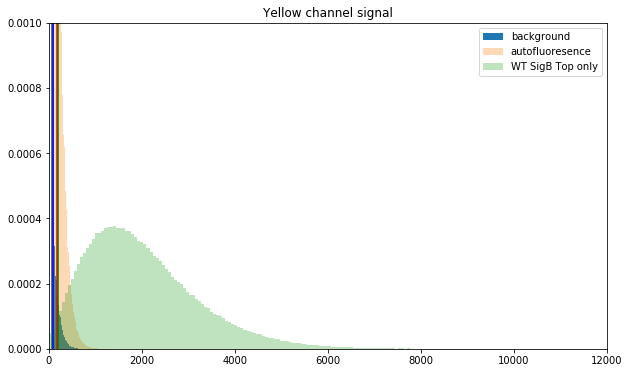

In [30]:
plt.figure(figsize=(10,6))
ymax = 0.001
plt.hist(bg, bins=200, density=True, alpha=1.0, label="background");
plt.vlines(redux_means_10x["green_bg"], 0, ymax, color="blue")
plt.hist(af, bins=200, density=True, alpha=0.3, label="autofluoresence");
plt.vlines(redux_means_10x["green_bg"] + redux_means_10x["green_autofluor"], 0, ymax, color="red")
plt.hist(sb, bins=200, density=True, alpha=0.3, label="WT SigB Top only")
plt.vlines(redux_means_10x["green_bg"] + redux_means_10x["green_autofluor"] + redux_means_10x["green_bleedthrough"], 0, ymax, color="green")
plt.legend()
plt.ylim(0, ymax)
plt.xlim(0, 12000)
plt.title("Yellow channel signal")
plt.show() # make figure visible in gitlab

So there is quite an overlap with the Top YFP signal and autofluoresence

## The numbers for the individual images. 

In [31]:
bleed_redux = pd.read_csv(data_path +".tsv", sep="\t", index_col="index")

In [32]:
bleed_redux.drop(['dir_name'], axis=1)

,file_name,strain,green_raw_actual_bottom,green_raw_actual_top,green_raw_actual_all,green_bg,green_autofluor,green_bleedthrough,green_actual_bottom,green_actual_top,green_actual_all,red_bg,red_autofluor
index,,,,,,,,,,,,,
0,RFP_only_48hrs_1_1_271114_sect,RFP,NaN,NaN,NaN,77.278212,NaN,26.413956,NaN,NaN,NaN,93.570540,NaN
1,RFP_only_48hrs_1_2_271114_sect,RFP,NaN,NaN,NaN,78.186503,NaN,41.187560,NaN,NaN,NaN,81.673133,NaN
2,RFP_only_48hrs_1_3_271114_sect,RFP,NaN,NaN,NaN,79.214272,NaN,50.523798,NaN,NaN,NaN,79.796521,NaN
3,RFP_only_48hrs_1_4_271114_sect,RFP,NaN,NaN,NaN,78.378151,NaN,38.993842,NaN,NaN,NaN,81.729735,NaN
4,RFP_only_48hrs_1_5_271114_sect,RFP,NaN,NaN,NaN,80.171586,NaN,42.040448,NaN,NaN,NaN,93.050841,NaN
5,RFP_only_48hrs_2_1_271114_sect,RFP,NaN,NaN,NaN,82.489568,NaN,24.046440,NaN,NaN,NaN,94.939793,NaN
6,RFP_only_48hrs_2_2_271114_sect,RFP,NaN,NaN,NaN,82.081742,NaN,20.820342,NaN,NaN,NaN,87.944955,NaN
7,RFP_only_48hrs_2_3_271114_sect,RFP,NaN,NaN,NaN,81.591422,NaN,24.352655,NaN,NaN,NaN,86.694974,NaN
8,RFP_only_48hrs_2_4_271114_sect,RFP,NaN,NaN,NaN,85.719318,NaN,26.430063,NaN,NaN,NaN,87.952604,NaN


In [33]:
def area_plots(ax, df, mean_vals, columns, labels, colors):
    ax = df[columns].plot.area(ax=ax, linewidth=0, color=colors)
    leg = ax.get_legend() 
    for l, t in zip(leg.get_texts(), labels):
        l.set_text(t)
    #leg.set_loc("upper left")
    total = 0
    artists = []
    for col in columns:
        total += mean_vals[col]
        ax.axhline(total, linewidth=1.0, color="black")
        #ax.annotate()
    ax.set_xlabel("")
    return ax, artists

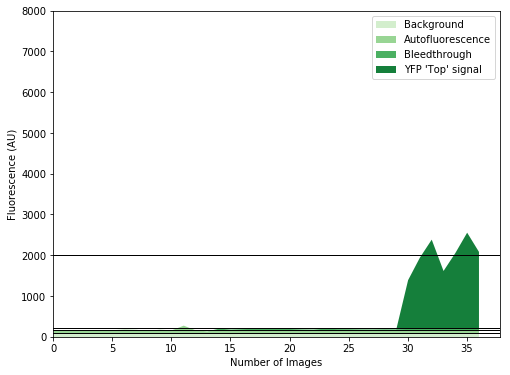

In [34]:
indiv_df = bleed_redux.copy()
means_df = redux_means_10x.copy()

indiv_df["strain"] = pd.Categorical(indiv_df["strain"], categories=["WT", "RFP", "SigB"], ordered=True)
indiv_df.sort_values(by=["strain"], inplace=True)
indiv_df = indiv_df.reset_index(drop=True)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(8, 6)


columns_green = ['green_bg',
                'green_autofluor',
                'green_bleedthrough',"green_actual_top" ] 
new_labels = ["Background", "Autofluorescence", "Bleedthrough", "YFP 'Top' signal"]

n = len(columns_green)+1
greens = [plt.cm.Greens(i/n) for i in range(1, n)]

indiv_df.loc[indiv_df["green_bg"].isnull(), "green_bg"] = means_df["green_bg"]
indiv_df.loc[indiv_df["strain"]=="RFP", "green_autofluor"] = means_df["green_autofluor"]
indiv_df.loc[indiv_df["strain"]=="SigB", "green_autofluor"] = means_df["green_autofluor"]
indiv_df.loc[indiv_df["strain"]=="SigB", "green_bleedthrough"] = means_df["green_bleedthrough"]

ax,_ = area_plots(ax, indiv_df, means_df, columns_green, new_labels, greens)

a = ax
a.get_yaxis().set_tick_params(direction='out')
a.get_xaxis().set_tick_params(direction='out')
a.set_xlim(left=0)
a.set_ylim(0, 8000)
a.set_xlabel("Number of Images")
a.set_ylabel("Fluorescence (AU)")
plt.show() # make figure visible in gitlab

## Bleed through from the RFP channel counts for

### Ratio of bleed through to the YFP signal 

In [36]:
redux_means_10x["green_bleedthrough"]/redux_means_10x["green_actual_top"]

0.016626299830390455

### Proportion of Green Signal that is RFP (estimated from means)

In [37]:
green_signal =  sum([ redux_means_10x[k] for k in ["green_bg", "green_autofluor", "green_bleedthrough", "green_actual_top"]])

In [38]:
redux_means_10x["green_bleedthrough"]/green_signal

0.014931021767367854

### Proportion of Green Signal that is RFP (from raw signal)

In [39]:
redux_means_10x["green_bleedthrough"]/redux_means_10x["green_raw_actual_top"]

0.014941399985887498